In [ ]:
!gdown --id 1JVbEjEYX1JLw5N0VxS3dHIKTh9xzpwMr

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1JVbEjEYX1JLw5N0VxS3dHIKTh9xzpwMr
From (redirected): https://drive.google.com/uc?id=1JVbEjEYX1JLw5N0VxS3dHIKTh9xzpwMr&confirm=t&uuid=c210c36a-a37d-4d9c-b967-17198e9d09f6
To: /content/90animals.zip
100% 688M/688M [00:19<00:00, 34.7MB/s]


In [ ]:
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

from google.colab.patches import cv2_imshow
import cv2
from tensorflow import keras
from keras.models import Model
from keras import layers
from keras.models import Sequential
from keras.models import load_model
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout, Dense, Flatten, BatchNormalization, GlobalAveragePooling2D
from keras.preprocessing import image
from collections import Counter

In [ ]:
# Menggunakan modul zipfile untuk mengekstrak isi dari file ZIP
import zipfile

local_zip = '/content/90animals.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()

zip_ref.close()

In [ ]:
import os

data_dir = '/content/animals/animals'

Name = os.listdir(data_dir)
print(Name)
print(len(Name))

total=list(range(len(Name)))
normal_mapping=dict(zip(Name,total))
reverse_mapping=dict(zip(total,Name))

['otter', 'mosquito', 'zebra', 'wolf', 'tiger', 'lobster', 'hare', 'kangaroo', 'rat', 'octopus', 'donkey', 'jellyfish', 'whale', 'sandpiper', 'possum', 'ox', 'bee', 'boar', 'crab', 'ladybugs', 'bat', 'cockroach', 'leopard', 'hornbill', 'penguin', 'reindeer', 'squirrel', 'dolphin', 'dragonfly', 'fly', 'shark', 'hyena', 'wombat', 'elephant', 'panda', 'duck', 'dog', 'hedgehog', 'raccoon', 'pig', 'snake', 'lizard', 'goldfish', 'grasshopper', 'eagle', 'sheep', 'moth', 'horse', 'coyote', 'fox', 'mouse', 'bison', 'swan', 'cat', 'gorilla', 'badger', 'parrot', 'sparrow', 'antelope', 'orangutan', 'hippopotamus', 'starfish', 'goat', 'flamingo', 'beetle', 'rhinoceros', 'bear', 'hummingbird', 'owl', 'deer', 'crow', 'turkey', 'hamster', 'woodpecker', 'oyster', 'koala', 'goose', 'seahorse', 'pelecaniformes', 'pigeon', 'okapi', 'porcupine', 'butterfly', 'lion', 'turtle', 'cow', 'squid', 'caterpillar', 'chimpanzee', 'seal']
90


## Pre-process Data

In [ ]:
preprocess_input = tf.keras.applications.efficientnet_v2.preprocess_input

TARGET_SIZE = (240, 240)
batch_size=64

train_datagen = ImageDataGenerator(
        validation_split=0.2,
        rotation_range=30,
        width_shift_range=0.2,
        preprocessing_function=preprocess_input,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=TARGET_SIZE,
    class_mode='categorical',
    batch_size=batch_size,
    subset = "training")


validation_datagen = ImageDataGenerator(validation_split=0.1)
validation_generator = validation_datagen.flow_from_directory(
    data_dir,
    target_size=TARGET_SIZE,
    class_mode='categorical',
    batch_size=batch_size,
    subset = "validation")

Found 4320 images belonging to 90 classes.
Found 540 images belonging to 90 classes.


In [ ]:
os.chdir('/content')
np.save('labels', train_generator.class_indices)

In [ ]:
class_indices = np.load('labels.npy', allow_pickle=True).item()
print(class_indices)


{'antelope': 0, 'badger': 1, 'bat': 2, 'bear': 3, 'bee': 4, 'beetle': 5, 'bison': 6, 'boar': 7, 'butterfly': 8, 'cat': 9, 'caterpillar': 10, 'chimpanzee': 11, 'cockroach': 12, 'cow': 13, 'coyote': 14, 'crab': 15, 'crow': 16, 'deer': 17, 'dog': 18, 'dolphin': 19, 'donkey': 20, 'dragonfly': 21, 'duck': 22, 'eagle': 23, 'elephant': 24, 'flamingo': 25, 'fly': 26, 'fox': 27, 'goat': 28, 'goldfish': 29, 'goose': 30, 'gorilla': 31, 'grasshopper': 32, 'hamster': 33, 'hare': 34, 'hedgehog': 35, 'hippopotamus': 36, 'hornbill': 37, 'horse': 38, 'hummingbird': 39, 'hyena': 40, 'jellyfish': 41, 'kangaroo': 42, 'koala': 43, 'ladybugs': 44, 'leopard': 45, 'lion': 46, 'lizard': 47, 'lobster': 48, 'mosquito': 49, 'moth': 50, 'mouse': 51, 'octopus': 52, 'okapi': 53, 'orangutan': 54, 'otter': 55, 'owl': 56, 'ox': 57, 'oyster': 58, 'panda': 59, 'parrot': 60, 'pelecaniformes': 61, 'penguin': 62, 'pig': 63, 'pigeon': 64, 'porcupine': 65, 'possum': 66, 'raccoon': 67, 'rat': 68, 'reindeer': 69, 'rhinoceros': 

## Create Model

In [ ]:
!gdown --id 1dzzbGvaDKw2wYrGpF590uD51RxC5Db4v

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1dzzbGvaDKw2wYrGpF590uD51RxC5Db4v
To: /content/efficientnetb1_notop.h5
100% 27.0M/27.0M [00:00<00:00, 32.3MB/s]


In [ ]:
weights_file = '/content/efficientnetb1_notop.h5'

IMG_SHAPE = (240, 240, 3)
model = tf.keras.applications.EfficientNetB1(input_shape=IMG_SHAPE, include_top=False, weights=None)

# memuat pre-trained weights yang sudah didownload
model.load_weights(weights_file)

# membekukan weights dari layers.
for layer in model.layers:
  layer.trainable = False

In [ ]:
model.summary()

Model: "efficientnetb1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 240, 240, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 240, 240, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 240, 240, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 stem_conv_pad (ZeroPadding  (None, 241, 241, 3)          0         ['normalization[0

In [ ]:
# Mengambil layer terakhir dari model pre_trained untuk digunakan dalam training
last_layer = model.get_layer('top_activation')

print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 8, 8, 1280)


In [ ]:
CLASSES = 90
# Menambahkan layer yang terkoneksi dengan 1.024 unit tersembunyi dan aktivasi ReLU
x = layers.Dense(1024, activation='relu')(last_output)
x = layers.Dropout(0.2)(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Flatten()(x)
x = layers.Dense  (CLASSES, activation='softmax')(x)

# Menambahkan dense network ke model dasar
model = Model(model.input, x)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 240, 240, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 240, 240, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 240, 240, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 stem_conv_pad (ZeroPadding  (None, 241, 241, 3)          0         ['normalization[0][0]']   

## Callback function

In [ ]:
# Mendefinisikan fungsi Callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):

    # cek akurasi
    if(logs.get('loss') < 0.15):
      # Berhenti jika sudah mencapai batas
      print("\nTraining is stopped!")
      self.model.stop_training = True

# Menginstansiasi class
Callbacks = myCallback()

## Train The Model

In [ ]:
model.compile(optimizer = "rmsprop",
              loss = tf.keras.losses.CategoricalCrossentropy(),
              metrics = ['accuracy'])

In [ ]:
# Fitting model
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 36,
            epochs = 10,
            callbacks = [Callbacks])

Epoch 1/10
36/36 [==============================] - 74s 2s/step - loss: 2.2283 - accuracy: 0.5569 - val_loss: 0.8244 - val_accuracy: 0.8130
Epoch 2/10
36/36 [==============================] - 53s 1s/step - loss: 0.7144 - accuracy: 0.8199 - val_loss: 0.4813 - val_accuracy: 0.8704
Epoch 3/10
36/36 [==============================] - 54s 2s/step - loss: 0.5351 - accuracy: 0.8504 - val_loss: 0.3675 - val_accuracy: 0.9037
Epoch 4/10
36/36 [==============================] - 58s 2s/step - loss: 0.3677 - accuracy: 0.9002 - val_loss: 0.3653 - val_accuracy: 0.8981
Epoch 5/10
36/36 [==============================] - 51s 1s/step - loss: 0.3245 - accuracy: 0.9040 - val_loss: 0.3448 - val_accuracy: 0.8926
Epoch 6/10
36/36 [==============================] - 52s 1s/step - loss: 0.2628 - accuracy: 0.9258 - val_loss: 0.3281 - val_accuracy: 0.8944
Epoch 7/10
36/36 [==============================] - 51s 1s/step - loss: 0.2279 - accuracy: 0.9371 - val_loss: 0.2959 - val_accuracy: 0.9056
Epoch 8/10
36/36 [==

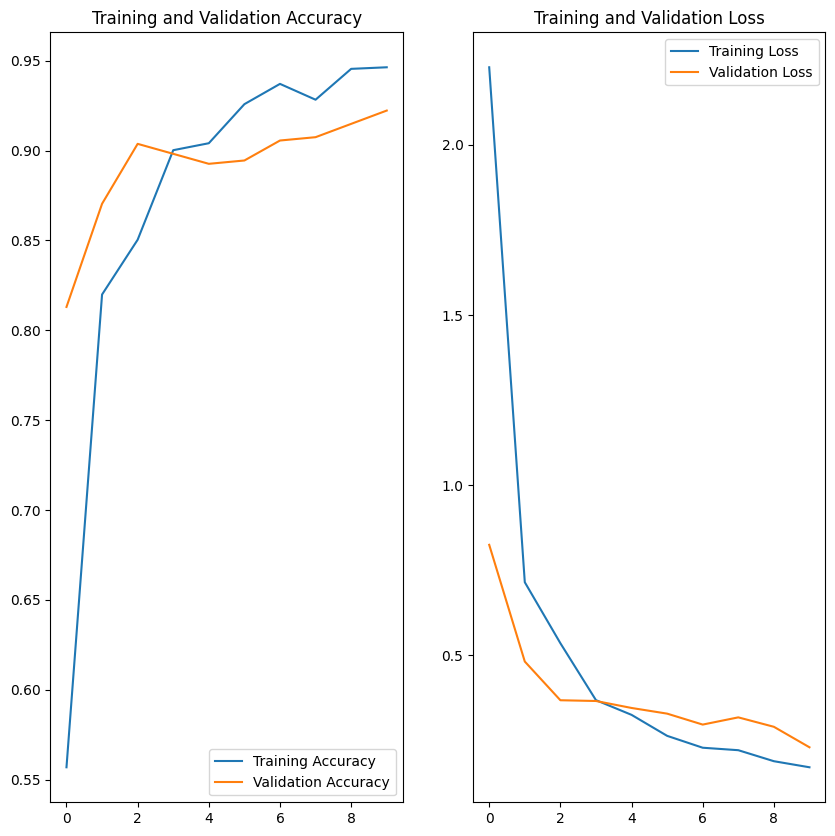

In [ ]:
# Evaluasi model dengan membandingkan akurasi training, validasi, dan loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
# Menyimpan model.h5
model.save("models.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Evaluate the Model

In [ ]:
model = keras.models.load_model('/content/models.h5')

In [ ]:
if os.path.isfile('labels.npy'):
    class_indices = np.load('labels.npy', allow_pickle=True).item()

print(class_indices)

{'antelope': 0, 'badger': 1, 'bat': 2, 'bear': 3, 'bee': 4, 'beetle': 5, 'bison': 6, 'boar': 7, 'butterfly': 8, 'cat': 9, 'caterpillar': 10, 'chimpanzee': 11, 'cockroach': 12, 'cow': 13, 'coyote': 14, 'crab': 15, 'crow': 16, 'deer': 17, 'dog': 18, 'dolphin': 19, 'donkey': 20, 'dragonfly': 21, 'duck': 22, 'eagle': 23, 'elephant': 24, 'flamingo': 25, 'fly': 26, 'fox': 27, 'goat': 28, 'goldfish': 29, 'goose': 30, 'gorilla': 31, 'grasshopper': 32, 'hamster': 33, 'hare': 34, 'hedgehog': 35, 'hippopotamus': 36, 'hornbill': 37, 'horse': 38, 'hummingbird': 39, 'hyena': 40, 'jellyfish': 41, 'kangaroo': 42, 'koala': 43, 'ladybugs': 44, 'leopard': 45, 'lion': 46, 'lizard': 47, 'lobster': 48, 'mosquito': 49, 'moth': 50, 'mouse': 51, 'octopus': 52, 'okapi': 53, 'orangutan': 54, 'otter': 55, 'owl': 56, 'ox': 57, 'oyster': 58, 'panda': 59, 'parrot': 60, 'pelecaniformes': 61, 'penguin': 62, 'pig': 63, 'pigeon': 64, 'porcupine': 65, 'possum': 66, 'raccoon': 67, 'rat': 68, 'reindeer': 69, 'rhinoceros': 

In [ ]:
#https://drive.google.com/file/d/1GUmjKc-GIEbyVGQrWB9bWD8yUDuenKYg/view?usp=drive_link
#https://drive.google.com/file/d/1-4mUGEKOA8zCNLPvCpg9qq4xha_d2b8u/view?usp=drive_link

In [ ]:
!gdown --id 1-4mUGEKOA8zCNLPvCpg9qq4xha_d2b8u

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1-4mUGEKOA8zCNLPvCpg9qq4xha_d2b8u
To: /content/Koceengggg.jpg
100% 25.1k/25.1k [00:00<00:00, 58.9MB/s]


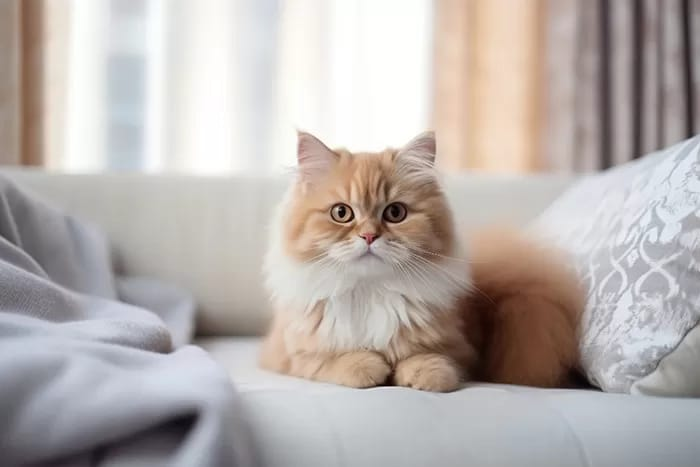

In [ ]:
img_path = '/content/Koceengggg.jpg'
im = cv2.imread(img_path)

cv2_imshow(im)


In [ ]:
img_path = '/content/Koceengggg.jpg'

im = image.load_img(img_path, target_size=(240, 240))
im = image.img_to_array(im)
im = im.reshape(1,240,240,3)

single_pred = np.squeeze(model.predict(im))

results_dict = dict(zip(class_indices.keys(), single_pred))
result = max(results_dict, key=results_dict.get)
print(result)

top3_list = sorted(results_dict, key=results_dict.get, reverse=True)[:3]
print(top3_list)

top3 = dict(Counter(results_dict).most_common(3))
for key, value in top3.items():
    top3.update({key: str(round(value*100, 2))+'%'})

print(top3)

1/1 [==============================] - 4s 4s/step
cat
['cat', 'hamster', 'dog']
{'cat': '99.02%', 'hamster': '0.49%', 'dog': '0.14%'}


## TF Lite Model


In [ ]:
model = keras.models.load_model('/content/models.h5')

In [ ]:
tf.keras.backend.floatx()

'float32'

In [ ]:
TF_LITE_NAME = "tf_lite_model.tflite"
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)

In [ ]:
tf_lite_converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = tf_lite_converter.convert()

with open(TF_LITE_NAME, 'wb') as f:
  f.write(tflite_model)

In [ ]:
TF_LITE_NAME = "tflite_model_float16.tflite"
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)

In [ ]:
tf_lite_converter.target_spec.supported_types = [tf.float16]
tflite_model = tf_lite_converter.convert()

with open(TF_LITE_NAME, 'wb') as f:
  f.write(tflite_model)

In [ ]:
TF_LITE_NAME = "tflite_model_mix.tflite"
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)

In [ ]:
tf_lite_converter.optimizations = [tf.lite.Optimize.DEFAULT]
tf_lite_converter.target_spec.supported_types = [tf.float16]
tflite_model = tf_lite_converter.convert()

with open(TF_LITE_NAME, 'wb') as f:
  f.write(tflite_model)

In [ ]:
TF_LITE_NAME = "tflite_model_Optimization.tflite"
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)

In [ ]:
tf_lite_converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = tf_lite_converter.convert()

with open(TF_LITE_NAME, 'wb') as f:
  f.write(tflite_model)

## Model JSON+BIN

In [ ]:
!pip3 install tensorflowjs

In [ ]:
!cd /content/
!tensorflowjs_converter --input_format=keras --output_format=tfjs_layers_model /content/models.h5 /tmp/tfjs_test/

2024-06-21 03:52:43.215923: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-21 03:52:45.512628: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
weight normalization/count with shape () and dtype int64 was auto converted to the type int32


In [ ]:
!zip -r /tmp/tfjs_test/modeldata.zip /tmp/tfjs_test/

  adding: tmp/tfjs_test/ (stored 0%)
  adding: tmp/tfjs_test/group1-shard7of8.bin (deflated 7%)
  adding: tmp/tfjs_test/group1-shard2of8.bin (deflated 8%)
  adding: tmp/tfjs_test/model.json (deflated 96%)
  adding: tmp/tfjs_test/group1-shard3of8.bin (deflated 8%)
  adding: tmp/tfjs_test/group1-shard8of8.bin (deflated 8%)
  adding: tmp/tfjs_test/group1-shard1of8.bin (deflated 7%)
  adding: tmp/tfjs_test/group1-shard4of8.bin (deflated 8%)
  adding: tmp/tfjs_test/group1-shard6of8.bin (deflated 8%)
  adding: tmp/tfjs_test/group1-shard5of8.bin (deflated 8%)
